In [2]:
"""
This code makes diagnostic plots for raw and postprocessed WRF-Solar output
Postprocessing using the Kalman Filter is from Rafael Alvarenga's code (rafael.alvarenga@etu.univ-guyane.fr)
"""
from file_func import *
from plotting import *
import matplotlib.image as mpimg
import seaborn as sns
from scipy.stats import ks_2samp

In [3]:
li = pd.DataFrame()
method= 'KF'
nb_historical_days = nbhd
for ens in ['ens0','ens1','ens2','ens3','ensmean']:
    for domain in ['d01', 'd02']:
        dir_path_recursive = f'{main_dir_path_recursive}/{ens}/{domain}/{station_name}/{nb_historical_days}_day_{method}'
        all_files = glob.glob(dir_path_recursive + "/*_df.csv")

        for filename in all_files:
            df = pd.read_csv(filename)
            df['rmse_mod'] = fitting(df)[7]
            df['r_mod'] = fitting(df)[0]
            df['mae_mod'] = fitting(df)[8]
            
            df['kfp_rmse'] = fitting_pred(df)[7]
            df['kfp_r'] = fitting_pred(df)[0]
            df['kfp_mae'] = fitting_pred(df)[8]
            
            df['kf_rmse'] = kf_fitting_pred(df)[7]
            df['kf_r'] = kf_fitting_pred(df)[0]
            df['kf_mae'] = kf_fitting_pred(df)[8]
   
            li = li.append(df)
            print(filename)


output_junaug/ens2/d01/MO/42_day_KF/ens2_d01_42_day_KF_df.csv
output_junaug/ensmean/d01/MO/42_day_KF/ensmean_d01_42_day_KF_df.csv


ens0 d01 KstestResult(statistic=0.06401249024199844, pvalue=7.870700704203194e-12) 195.2790421385229
ens0 d02 KstestResult(statistic=0.041206655263567094, pvalue=3.611294515267324e-05) 188.84073674125875
ens1 d01 KstestResult(statistic=0.22078536508437155, pvalue=9.103635705314365e-136) 236.21890692460204
ens1 d02 KstestResult(statistic=0.15, pvalue=5.334362540706024e-63) 216.7103075427156
ens2 d01 KstestResult(statistic=0.1853401518673485, pvalue=3.027423898048629e-97) 185.46640197063238
ens2 d02 KstestResult(statistic=0.19882225321555866, pvalue=6.086770093824776e-112) 187.52685177313788
ens3 d01 KstestResult(statistic=0.09298000929800093, pvalue=1.0951177930137174e-24) 190.46454585333424
ens3 d02 KstestResult(statistic=0.15651634898496825, pvalue=2.3409754693613855e-69) 197.41555594283628
ensmean d01 KstestResult(statistic=0.10196807686347435, pvalue=1.2989935923335226e-29) 155.69706486724326
ensmean d02 KstestResult(statistic=0.10196807686347435, pvalue=1.2989935923335226e-29) 155.

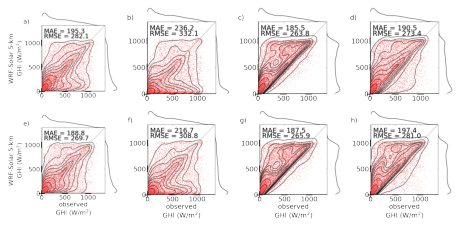

In [4]:
da_mean = li

x_new = np.linspace(0.01, 1360, 1000)
color_= 'red'
i =0
for domain in ['d01','d02']:
    for ens in ['ens0','ens1','ens2','ens3']:
        
        if i==0:
            l = 'a'
        elif i==1:
            l = 'b'
        elif i==2:
            l = 'c'
        elif i==3:
            l = 'd'
        elif i==4:
            l = 'e'
        elif i==5:
            l = 'f'
        elif i==6:
            l = 'g'
        elif i==7:
            l = 'h'
        
        back = da_mean[da_mean['ens'] == ens]
        back = back[back['domain'] == domain]

        method = 'WRF-Solar 5-km'
        rmse = back['rmse_mod'].mean()
        r_ = back['r_mod'].mean()
        mae = back['mae_mod'].mean()

        g0 = sns.jointplot(x="ghi_obs", y="ghi_mod", data=back, kind="kde", space=0,  xlim = (0,1360), ylim = (0,1360), marginal_kws={"color":"black", "lw":1.5}, joint_kws={"colors":"black","cmap":None, "linewidths":1.5}, shade=False, n_levels=10)
        sns.scatterplot(data=back, x='ghi_obs', y='ghi_mod',color=color_, ax=g0.ax_joint,s=6,alpha=0.5)
        g0.ax_joint.plot(x_new,x_new,c='gray',linewidth=1.1)
        g0.ax_joint.text( -400, 1400,f'{l})', fontsize=30, color='k')
        g0.ax_joint.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=30, color='black')
        g0.ax_joint.text( 50, 1200,'MAE = %0.1f'%mae, fontsize=30, color='black')
        if (i==0) | (i==4):
            g0.ax_joint.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=30) 
        else:
            g0.ax_joint.set_ylabel(' ',  fontsize=30)
        if (i>=4):    
            g0.ax_joint.set_xlabel(f'observed\nGHI (W/m$^2$)',  fontsize=30)
        else:
            g0.ax_joint.set_xlabel(' ',  fontsize=30)
        
        g0.ax_joint.tick_params(axis='both', which='major', labelsize=30)
        [x.set_linewidth(2.5) for x in g0.ax_joint.spines.values()]
        g0.ax_joint.xaxis.set_tick_params(width=30)
        g0.ax_joint.yaxis.set_tick_params(width=30)
        g0.savefig(f'{ens}_{domain}.png')
        plt.close(g0.fig)
        i = i+1
        
f, axarr = plt.subplots(2, 4, figsize=(8, 4))

axarr[0,0].imshow(mpimg.imread('ens0_d01.png'))
axarr[0,1].imshow(mpimg.imread('ens1_d01.png'))
axarr[0,2].imshow(mpimg.imread('ens2_d01.png'))
axarr[0,3].imshow(mpimg.imread('ens3_d01.png'))

axarr[1,0].imshow(mpimg.imread('ens0_d02.png'))
axarr[1,1].imshow(mpimg.imread('ens1_d02.png'))
axarr[1,2].imshow(mpimg.imread('ens2_d02.png'))
axarr[1,3].imshow(mpimg.imread('ens3_d02.png'))
[ax.set_axis_off() for ax in axarr.ravel()]

plt.subplots_adjust(wspace=-0., hspace=-0.05)
#plt.tight_layout()
plt.savefig(f"{main_dir_path_recursive}/models_Manila_scatplot_{nb_historical_days}_img.png", dpi=500,  facecolor='white', bbox_inches="tight")


#perform Kolmogorov-Smirnov test

##########################################
da_mean = li
for ens in ['ens0','ens1','ens2','ens3','ensmean']:
    for domain in ['d01', 'd02']:
        back = da_mean[da_mean['ens'] == ens]
        back = back[back['domain'] == domain]
        data1 = back['ghi_obs']
        data2 = back['ghi_mod']
        print(ens, domain, ks_2samp(data1, data2),mean_absolute_error(data1, data2))
        


In [ ]:


x_new = np.linspace(0.01, 1360, 1000)
color_= 'red'
i =0

domain = 'd01'
for cld in ['cloudy', 'clear']:
    for ens in ['ens0','ens1','ens2','ens3']:
        da_mean = li
        if cld == 'cloudy':
            da_mean = da_mean[da_mean['flag_clear'] == 'N']
            if i==0:
                l = 'a'
            elif i==1:
                l = 'b'
            elif i==2:
                l = 'c'
            elif i==3:
                l = 'd'
                
        elif cld == 'clear':
            da_mean = da_mean[da_mean['flag_clear'] == 'Y']
            if i==4:
                l = 'e'
            elif i==5:
                l = 'f'
            elif i==6:
                l = 'g'
            elif i==7:
                l = 'h'
        

        back = da_mean[da_mean['ens'] == ens]
        back = back[back['domain'] == domain]

        method = 'WRF-Solar 5-km'
        rmse = fitting(back)[7]
        r_ =  fitting(back)[0]
        mae = fitting(back)[8]

        if cld == 'cloudy':
            g0 = sns.jointplot(x="ghi_obs", y="ghi_mod", data=back, kind="kde", space=0,  xlim = (0,1360), ylim = (0,1360), marginal_kws={"color":"black", "lw":1.5}, joint_kws={"colors":"black","cmap":None, "linewidths":1.5}, shade=False, n_levels=10)
            sns.scatterplot(data=back, x='ghi_obs', y='ghi_mod',color=color_, ax=g0.ax_joint,s=6,alpha=0.5)
        if cld == 'clear':
            g0 = sns.jointplot(x="ghi_obs", y="ghi_mod", data=back, kind="kde", space=0,  xlim = (0,1360), ylim = (0,1360), marginal_kws={"color":"black", "lw":1.5}, joint_kws={"colors":"gray","cmap":None, "linewidths":0.5}, shade=False, n_levels=10)
            sns.scatterplot(data=back, x='ghi_obs', y='ghi_mod',color=color_, ax=g0.ax_joint,s=12,alpha=1.)
        
        g0.ax_joint.plot(x_new,x_new,c='gray',linewidth=1.1)
        g0.ax_joint.text( -400, 1400,f'{l})', fontsize=30, color='k')
        g0.ax_joint.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=30, color='black')
        g0.ax_joint.text( 50, 1200,'MAE = %0.1f'%mae, fontsize=30, color='black')
        if (i==0) | (i==4):
            g0.ax_joint.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=30) 
        else:
            g0.ax_joint.set_ylabel(' ',  fontsize=30)
        
        if (i>=4):    
            g0.ax_joint.set_xlabel(f'observed\nGHI (W/m$^2$)',  fontsize=30)
        else:
            g0.ax_joint.set_xlabel(' ',  fontsize=30)
        
        g0.ax_joint.tick_params(axis='both', which='major', labelsize=30)
        [x.set_linewidth(2.5) for x in g0.ax_joint.spines.values()]
        g0.ax_joint.xaxis.set_tick_params(width=30)
        g0.ax_joint.yaxis.set_tick_params(width=30)
        g0.savefig(f'{ens}_{cld}.png')
        plt.close(g0.fig)
        i = i+1

f, axarr = plt.subplots(2, 4, figsize=(8, 4))

axarr[0,0].imshow(mpimg.imread('ens0_cloudy.png'))
axarr[0,1].imshow(mpimg.imread('ens1_cloudy.png'))
axarr[0,2].imshow(mpimg.imread('ens2_cloudy.png'))
axarr[0,3].imshow(mpimg.imread('ens3_cloudy.png'))

axarr[1,0].imshow(mpimg.imread('ens0_clear.png'))
axarr[1,1].imshow(mpimg.imread('ens1_clear.png'))
axarr[1,2].imshow(mpimg.imread('ens2_clear.png'))
axarr[1,3].imshow(mpimg.imread('ens3_clear.png'))
[ax.set_axis_off() for ax in axarr.ravel()]

plt.subplots_adjust(wspace=-0., hspace=-0.05)
#plt.tight_layout()
plt.savefig(f"{main_dir_path_recursive}/models_Manila_scatplot_{nb_historical_days}_d01_fig7.png", dpi=500,  facecolor='white', bbox_inches="tight")



In [6]:


x_new = np.linspace(0.01, 1360, 1000)
color_= 'red'
i =0

domain = 'd01'
ens = 'ens2'
for cld in ['cloudy', 'clear']:
    for method in ['WRF-Solar 5-km','KF']:
        da_mean = li
        back = da_mean[da_mean['ens'] == ens]
        back = back[back['domain'] == domain]
        nb_LTs = len(np.unique(back.LT))
        back =  back.iloc[nb_LTs*nb_historical_days:,:] 
        
        if cld == 'cloudy':
            back = back[back['flag_clear'] == 'N']
            if i==0:
                l = 'c'
            elif i==1:
                l = 'd'


        elif cld == 'clear':
            back = back[back['flag_clear'] == 'Y']
            if i==2:
                l = 'e'
            elif i==3:
                l = 'f'

        if (method == 'WRF-Solar 5-km' ):
            color_= 'red'
            back['pl'] = back['ghi_mod']
            rmse = fitting(back)[7]
            r_ =  fitting(back)[0]
            mae = fitting(back)[8]
        elif (method == 'KF'):
            color_= 'green'
            back['pl'] = back['GHI_pred_kf_only']   
            rmse = kf_fitting_pred(back)[7]
            r_ = kf_fitting_pred(back)[0]
            mae = kf_fitting_pred(back)[8]

        if cld == 'cloudy':
            g0 = sns.jointplot(x="ghi_obs", y="pl", data=back, kind="kde", space=0,  xlim = (0,1360), ylim = (0,1360), marginal_kws={"color":"black", "lw":3.5}, joint_kws={"colors":"black","cmap":None, "linewidths":1.5}, shade=False, n_levels=6)
            sns.scatterplot(data=back, x='ghi_obs', y='pl',color=color_, ax=g0.ax_joint,s=8,alpha=0.8)
        if cld == 'clear':
            g0 = sns.jointplot(x="ghi_obs", y="pl", data=back, kind="kde", space=0,  xlim = (0,1360), ylim = (0,1360), marginal_kws={"color":"black", "lw":3.5}, joint_kws={"colors":"gray","cmap":None, "linewidths":0.5}, shade=False, n_levels=6)
            sns.scatterplot(data=back, x='ghi_obs', y='pl',color=color_, ax=g0.ax_joint,s=12,alpha=1.)

        g0.ax_joint.plot(x_new,x_new,c='gray',linewidth=1.1)
        g0.ax_joint.text( -400, 1400,f'{l})', fontsize=30, color='k')
        g0.ax_joint.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=30, color='black')
        g0.ax_joint.text( 50, 1200,'MAE = %0.1f'%mae, fontsize=30, color='black')
        g0.ax_joint.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=30) 
        if (i>=2):
            g0.ax_joint.set_xlabel(f'observed\nGHI (W/m$^2$)',  fontsize=30)
        else:
            g0.ax_joint.set_xlabel(' ',  fontsize=30)

        g0.ax_joint.tick_params(axis='both', which='major', labelsize=30)
        [x.set_linewidth(2.5) for x in g0.ax_joint.spines.values()]
        g0.ax_joint.xaxis.set_tick_params(width=30)
        g0.ax_joint.yaxis.set_tick_params(width=30)
        g0.savefig(f'{ens}_{domain}_{method}_{cld}.png')
        plt.close(g0.fig)
        i = i+1



In [9]:


x_new = np.linspace(0.01, 1360, 1000)
color_= 'red'
i =0

domain = 'd01'
ens = 'ens2'
for method in ['WRF-Solar 5-km','KF']:
    da_mean = li
    back = da_mean[da_mean['ens'] == ens]
    back = back[back['domain'] == domain]
    nb_LTs = len(np.unique(back.LT))
    back =  back.iloc[nb_LTs*nb_historical_days:,:] 
    
    if (method == 'WRF-Solar 5-km' ):
        l = 'a'
        color_= 'red'
        back['pl'] = back['ghi_mod']
        rmse = back['rmse_mod'].mean()
        r_ = back['r_mod'].mean()
        mae = back['mae_mod'].mean()
    elif (method == 'KF'):
        l = 'b'
        color_= 'green'
        back['pl'] = back['GHI_pred_kf_only']   
        rmse = back['kf_rmse'].mean()
        r_ = back['kf_r'].mean()
        mae = back['kf_mae'].mean()
 
    g0 = sns.jointplot(x="ghi_obs", y="pl", data=back, kind="kde", space=0,  xlim = (0,1360), ylim = (0,1360), marginal_kws={"color":"black", "lw":3.5}, joint_kws={"colors":"black","cmap":None, "linewidths":1.5}, shade=False, n_levels=6)
    sns.scatterplot(data=back, x='ghi_obs', y='pl',color=color_, ax=g0.ax_joint,s=8,alpha=0.8)
    
    g0.ax_joint.plot(x_new,x_new,c='gray',linewidth=1.1)
    g0.ax_joint.text( -400, 1400,f'{l})', fontsize=30, color='k')
    g0.ax_joint.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=30, color='black')
    g0.ax_joint.text( 50, 1200,'MAE = %0.1f'%mae, fontsize=30, color='black')
    if (i==0) :
        g0.ax_joint.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=30) 
    else:
        g0.ax_joint.set_ylabel(' ',  fontsize=30)


    g0.ax_joint.set_xlabel(' ',  fontsize=30)

    g0.ax_joint.tick_params(axis='both', which='major', labelsize=30)
    [x.set_linewidth(2.5) for x in g0.ax_joint.spines.values()]
    g0.ax_joint.xaxis.set_tick_params(width=30)
    g0.ax_joint.yaxis.set_tick_params(width=30)
    g0.savefig(f'{ens}_{domain}_{method}.png')
    plt.close(g0.fig)
    i = i+1



ens2 d01 Y KstestResult(statistic=0.09222536984576644, pvalue=3.5536258166585436e-12) 156.66720517436136
ens2 d01 N KstestResult(statistic=0.09222536984576644, pvalue=3.5536258166585436e-12) 156.66720517436136


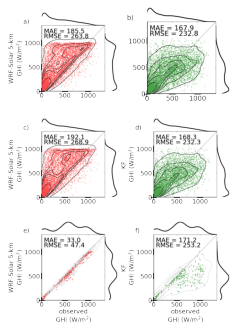

In [21]:
f, axarr = plt.subplots(3, 2, figsize=(4, 6))
ens = 'ens2'
axarr[0,0].imshow(mpimg.imread(f'{ens}_d01_WRF-Solar 5-km.png'))
axarr[0,1].imshow(mpimg.imread(f'{ens}_d01_KF.png'))

axarr[1,0].imshow(mpimg.imread(f'{ens}_d01_WRF-Solar 5-km_cloudy.png'))
axarr[1,1].imshow(mpimg.imread(f'{ens}_d01_KF_cloudy.png'))

axarr[2,0].imshow(mpimg.imread(f'{ens}_d01_WRF-Solar 5-km_clear.png'))
axarr[2,1].imshow(mpimg.imread(f'{ens}_d01_KF_clear.png'))


[ax.set_axis_off() for ax in axarr.ravel()]

plt.subplots_adjust(wspace=-0., hspace=-0.05)
#plt.tight_layout()
plt.savefig(f"{main_dir_path_recursive}/models_Manila_scatplot_{nb_historical_days}_d01_fig8_{ens}.png", dpi=500,  facecolor='white', bbox_inches="tight")

da_mean = li
for ens in ['ens2']:
    for domain in ['d01']:
        for flg in ['Y', 'N']:
            
            back = da_mean[da_mean['ens'] == ens]
            back = back[back['domain'] == domain]
            nb_LTs = len(np.unique(back.LT))
            back =  back.iloc[nb_LTs*nb_historical_days:,:] 
            #back = back[back['flag_clear'] == flg]
            data1 = back['ghi_obs']
            data2 = back['GHI_pred_kf_only']
            print(ens, domain, flg, ks_2samp(data1, data2),mean_absolute_error(data1, data2))
            


In [16]:
da_mean = li

back = da_mean[da_mean['ens'] == ens]
back = back[back['domain'] == domain]

nb_LTs = len(np.unique(back.LT))
print(nb_LTs)
back = back[back['flag_clear'] == flg]
back

78


,Unnamed: 0,Time,CMP22_Total_Solar,SPN1_Total_Solar,SPN1_Diff_Solar,CGR4_IR,dhi,ghi_a,sza,cossza,...,GHI_pred_improved_fin,rmse_mod,r_mod,mae_mod,kfp_rmse,kfp_r,kfp_mae,kf_rmse,kf_r,kf_mae
2,80,2020-06-02 05:50:00+08:00,0.052092,45.740527,26.809797,1220.141132,26.809797,45.740527,85.172973,0.084148,...,74.453596,263.818446,0.733868,185.466402,216.243217,0.695111,156.103874,217.184849,0.687674,158.600663
4,82,2020-06-02 06:10:00+08:00,0.104845,96.432498,34.065631,1221.888542,34.065631,96.432498,80.734649,0.161007,...,127.934884,263.818446,0.733868,185.466402,216.243217,0.695111,156.103874,217.184849,0.687674,158.600663
9,87,2020-06-02 07:00:00+08:00,0.335715,314.858227,52.203171,1239.236188,52.203171,314.858227,69.394402,0.351933,...,320.887730,263.818446,0.733868,185.466402,216.243217,0.695111,156.103874,217.184849,0.687674,158.600663
11,89,2020-06-02 07:20:00+08:00,0.403006,394.012641,60.024560,1246.272967,60.024560,394.012641,64.810192,0.425618,...,397.090487,263.818446,0.733868,185.466402,216.243217,0.695111,156.103874,217.184849,0.687674,158.600663
13,91,2020-06-02 07:40:00+08:00,0.493085,490.186128,71.056242,1254.217589,71.056242,490.186128,60.209000,0.496838,...,473.293243,263.818446,0.733868,185.466402,216.243217,0.695111,156.103874,217.184849,0.687674,158.600663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,6307,2020-08-22 06:00:00+08:00,0.598715,25.577464,25.100615,1216.321503,25.100615,25.577464,86.507778,0.060913,...,24.864456,263.818446,0.733868,185.466402,216.243217,0.695111,156.103874,217.184849,0.687674,158.600663
6313,6391,2020-08-23 07:30:00+08:00,0.478113,389.111266,69.877981,1235.825234,69.877981,389.111266,65.175831,0.419835,...,334.310460,263.818446,0.733868,185.466402,216.243217,0.695111,156.103874,217.184849,0.687674,158.600663
6314,6392,2020-08-23 07:40:00+08:00,0.418486,428.405801,78.112346,1240.947896,78.112346,428.405801,62.772400,0.457526,...,373.964157,263.818446,0.733868,185.466402,216.243217,0.695111,156.103874,217.184849,0.687674,158.600663
6315,6393,2020-08-23 07:50:00+08:00,0.379755,484.102305,85.514932,1246.074393,85.514932,484.102305,60.366371,0.494452,...,413.617853,263.818446,0.733868,185.466402,216.243217,0.695111,156.103874,217.184849,0.687674,158.600663


In [ ]:
def scat_model(da_mean):   
    
    
    x_new = np.linspace(0.01, 1360, 1000)
    fig = plt.figure()
    gs = fig.add_gridspec(6, 10)

    jump = 1    
    i_end = 1#2 
    j_end = 1#4 
    for i in range(0,i_end,jump):
        for j in range(0,j_end,jump):
            ax= fig.add_subplot(gs[i:i+1,j:j+1])

            if ((i == 0)):
                ax.tick_params(axis='x', bottom=False,top=False,labelbottom=False) 
            if (j > 0):
                ax.tick_params(axis='y', left=False,right=False,labelleft=False) 

            if (j == 0):
                ens = 'ens0'
                back = da_mean[da_mean['ens'] == ens]
                
            if (j == 1):
                ens = 'ens1'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 2):
                ens = 'ens2'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 3):
                ens = 'ens3'
                back = da_mean[da_mean['ens'] == ens]
            
            if (i == 0) & (j!=4): 
                color_= 'red'
                back = back[back['domain'] == 'd01']
                method = 'WRF-Solar \n5-km'
            
            if (i == 1) & (j!=4):     
                color_= 'red'
                back = back[back['domain'] == 'd02']
                method = 'WRF-Solar \n1-km'
                

            rmse = back['rmse_mod'].mean()
            r_ = back['r_mod'].mean()
                
            #ax.scatter(x=back['ghi_obs'],y=back['ghi_mod'],c=color_,s=0.01,alpha=0.3)
            sns.kdeplot(data=back, x="ghi_obs", y="ghi_mod")
            plt.plot(x_new,x_new,c='gray',linewidth=0.1)
            ax.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=3, color='black')
            ax.text( 50, 1200,'R* = %0.1f'%r_, fontsize=3, color='black')

            ax.tick_params(axis='both', which='major', labelsize=5)
            ax.set_ylim(0,1360)
            ax.set_xlim(0,1360)

            if (j==0):
                ax.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=5)  

            if ((i==0) & (j==0)):
                ax.text( -400, 1400,'a)', fontsize=5, color='k')
            if ((i==1) & (j==0)):
                ax.text( -400, 1300,'b)', fontsize=5, color='k')

            if (i==0):
                ax.text( 200, 1400,ens, fontsize=5, color=color_)
            if ((i==1) & (j==1)):
                ax.text( 0, -800,f'measured GHI (W/m$^2$)', fontsize=5, color='k')

    plt.savefig(f"{main_dir_path_recursive}/models_Manila_scatplot_{nb_historical_days}_updated.png", dpi=500,  facecolor='white', bbox_inches="tight")

scat_model(li)


In [ ]:
def scat_model_cloudy(da_mean):  
    
    da_mean = da_mean[da_mean['flag_clear'] == 'N']
    x_new = np.linspace(0.01, 1360, 1000)
    fig = plt.figure()
    gs = fig.add_gridspec(6, 10)
    
    

    jump = 1  
    i_end = 2 
    j_end = 4 
    for i in range(0,i_end,jump):
        for j in range(0,j_end,jump):

            ax= fig.add_subplot(gs[i:i+1,j:j+1])


            if ((i == 0)):
                ax.tick_params(axis='x', bottom=False,top=False,labelbottom=False) 
            if (j > 0):
                ax.tick_params(axis='y', left=False,right=False,labelleft=False) 

            if (j == 0):
                ens = 'ens0'
                back = da_mean[da_mean['ens'] == ens]
                
            if (j == 1):
                ens = 'ens1'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 2):
                ens = 'ens2'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 3):
                ens = 'ens3'
                back = da_mean[da_mean['ens'] == ens]

            
            if (i == 0) & (j!=4): 
                color_= 'red'
                back = back[back['domain'] == 'd01']
                method = 'WRF-Solar \n5-km'
            
            if (i == 1) & (j!=4):     
                color_= 'red'
                back = back[back['domain'] == 'd02']
                method = 'WRF-Solar \n1-km'
                
                
            rmse = fitting(back)[7]
            r_ =  fitting(back)[0]
                
            ax.scatter(x=back['ghi_obs'],y=back['ghi_mod'],c=color_,s=0.01,alpha=0.3)
            plt.plot(x_new,x_new,c='gray',linewidth=0.1)
            ax.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=3, color='black')
            ax.text( 50, 1200,'R* = %0.1f'%r_, fontsize=3, color='black')

            ax.tick_params(axis='both', which='major', labelsize=5)
            ax.set_ylim(0,1360)
            ax.set_xlim(0,1360)

            if (j==0):
                ax.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=5)  
                
            if ((i==0) & (j==0)):
                ax.text( -400, 1400,'a)', fontsize=5, color='k')
            if ((i==1) & (j==0)):
                ax.text( -400, 1300,'b)', fontsize=5, color='k')
                
            if (i==0):
                ax.text( 200, 1400,ens, fontsize=5, color=color_)
            if ((i==0) & (j==1)):
                ax.text( 500, 1600,'Cloudy Periods', fontsize=5, color='k')
            if ((i==1) & (j==1)):
                ax.text( 0, -800,f'measured GHI (W/m$^2$)', fontsize=5, color='k')


    plt.savefig(f"{main_dir_path_recursive}/models_cloudy_Manila_scatplot_{nb_historical_days}_updated.png", dpi=500,  facecolor='white', bbox_inches="tight")

scat_model_cloudy(li)


In [ ]:
def scat_model_clear(da_mean):   
    
    da_mean = da_mean[da_mean['flag_clear'] == 'Y']
    x_new = np.linspace(0.01, 1360, 1000)
    fig = plt.figure()
    gs = fig.add_gridspec(6, 10)
    
    

    jump = 1  
    i_end = 2 
    j_end = 4
    for i in range(0,i_end,jump):
        for j in range(0,j_end,jump):

            ax= fig.add_subplot(gs[i:i+1,j:j+1])


            if ((i == 0)):
                ax.tick_params(axis='x', bottom=False,top=False,labelbottom=False) 
            if (j > 0):
                ax.tick_params(axis='y', left=False,right=False,labelleft=False) 

            if (j == 0):
                ens = 'ens0'
                back = da_mean[da_mean['ens'] == ens]
                
            if (j == 1):
                ens = 'ens1'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 2):
                ens = 'ens2'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 3):
                ens = 'ens3'
                back = da_mean[da_mean['ens'] == ens]
            
            if (i == 0): 
                color_= 'red'
                back = back[back['domain'] == 'd01']
                method = 'WRF-Solar \n5-km'
            
            if (i == 1):     
                color_= 'red'
                back = back[back['domain'] == 'd02']
                method = 'WRF-Solar \n1-km'
                

            rmse = fitting(back)[7]
            r_ =  fitting(back)[0]
            
            ax.scatter(x=back['ghi_obs'],y=back['ghi_mod'],c=color_,s=0.01,alpha=0.3)
            plt.plot(x_new,x_new,c='gray',linewidth=0.1)
            ax.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=3, color='black')
            ax.text( 50, 1200,'R* = %0.1f'%r_, fontsize=3, color='black')

            ax.tick_params(axis='both', which='major', labelsize=5)
            ax.set_ylim(0,1360)
            ax.set_xlim(0,1360)


            if (j==0):
                ax.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=5)  

            if (i==0):
                ax.text( 200, 1400,ens, fontsize=5, color=color_)
                
            if ((i==0) & (j==0)):
                ax.text( -400, 1400,'a)', fontsize=5, color='k')
            if ((i==1) & (j==0)):
                ax.text( -400, 1300,'b)', fontsize=5, color='k')
            
            if ((i==0) & (j==1)):
                ax.text( 500, 1600,'Clear-Sky Periods', fontsize=5, color='k')
            if ((i==1) & (j==1)):
                ax.text( 0, -800,f'measured GHI (W/m$^2$)', fontsize=5, color='k')


    plt.savefig(f"{main_dir_path_recursive}/models_clear_Manila_scatplot_{nb_historical_days}_updated.png", dpi=500,  facecolor='white', bbox_inches="tight")

scat_model_clear(li)


In [ ]:
def scat_all(domain, da_mean):   
    plt_da = da_mean
    
    li_gr = da_mean[da_mean['domain'] == str(domain)]
    li_gr = li_gr.groupby(['Time']).agg({'GHI_pred_kf_only':'mean','ghi_obs':'mean'}).reset_index()
    li_gr['kf_rmse'] = kf_fitting_pred(li_gr)[7]
    li_gr['kf_r'] = kf_fitting_pred(li_gr)[0]

    li_gr2 = da_mean[da_mean['domain'] == str(domain)]
    li_gr2 = li_gr2.groupby(['Time']).agg({'GHI_pred_improved_fin':'mean','ghi_obs':'mean'}).reset_index()
    li_gr2['kfp_rmse'] = fitting_pred(li_gr2)[7]
    li_gr2['kfp_r'] = fitting_pred(li_gr2)[0]
    
    x_new = np.linspace(0.01, 1360, 1000)
    fig = plt.figure()
    gs = fig.add_gridspec(6, 10)
    
    da_mean = da_mean[da_mean['domain'] == str(domain)]
    if domain == 'd01':
            res = 5
    elif domain == 'd02':
            res = 1
    jump = 1
    i_end = 2
    j_end = 4
    for i in range(0,i_end,jump):
        for j in range(0,j_end,jump):

            ax= fig.add_subplot(gs[i:i+1,j:j+1])


            if ((i == 0) | (i == 1)):
                ax.tick_params(axis='x', bottom=False,top=False,labelbottom=False) 
            if (j > 0):
                ax.tick_params(axis='y', left=False,right=False,labelleft=False) 

            if (j == 0):
                ens = 'ens0'
                back = da_mean[da_mean['ens'] == ens]
                
            if (j == 1):#2):
                ens = 'ens1'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 2):#4):
                ens = 'ens2'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 3):#6):
                ens = 'ens3'
                back = da_mean[da_mean['ens'] == ens]
            
            if ((i == 0) & (j != 5)):
                method = f'WRF-Solar {res}-km'
                color_= 'red'
                back['pl'] = back['ghi_mod']
                rmse = back['rmse_mod'].mean()
                r_ = back['r_mod'].mean()
            if (i == 1):#2):
                method = 'KF'
                color_= 'green'
                back['pl'] = back['GHI_pred_kf_only']   
                rmse = back['kf_rmse'].mean()
                r_ = back['kf_r'].mean()

            
            if (((i == 0) & (j != 5)) | ((i != 0) & (j <= 5))):
                
                ax.scatter(x=back['ghi_obs'],y=back['pl'],c=color_,s=0.01,alpha=0.3)
                plt.plot(x_new,x_new,c='gray',linewidth=0.1)
                ax.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=3, color='black')
                ax.text( 50, 1200,'R* = %0.1f'%r_, fontsize=3, color='black')

                ax.tick_params(axis='both', which='major', labelsize=5)
                ax.set_ylim(0,1360)
                ax.set_xlim(0,1360)

                if (j==0):
                    ax.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=5)  

                if (i==0) | ((i!=0 ) & (j==5)):
                    ax.text( 200, 1400,ens, fontsize=5, color=color_)
                if ((i==1) & (j==1)):
                    ax.text( 200, -600,f'measured GHI (W/m$^2$)', fontsize=5, color='k')
                if ((i==0) & (j==0)):
                    ax.text( -400, 1400,'a)', fontsize=5, color='k')
                if ((i==1) & (j==0)):
                    ax.text( -400, 1300,'b)', fontsize=5, color='k')
                if ((i==2) & (j==0)):
                    ax.text( -400, 1300,'c)', fontsize=5, color='k')

    plt.savefig(f"{main_dir_path_recursive}/all_Manila_scatplot_{res}km_{domain}_{nb_historical_days}_updated.png", dpi=500,  facecolor='white', bbox_inches="tight")

scat_all('d01',li)
scat_all('d02',li)


In [ ]:
def scat_cloudy(domain, da_mean):   
    da_mean = da_mean[da_mean['flag_clear'] == 'N']
    
    li_gr = da_mean[da_mean['domain'] == str(domain)]
    li_gr = li_gr.groupby(['Time']).agg({'GHI_pred_kf_only':'mean','ghi_obs':'mean'}).reset_index()
    li_gr['kf_rmse'] = kf_fitting_pred(li_gr)[7]
    li_gr['kf_r'] = kf_fitting_pred(li_gr)[0]

    li_gr2 = da_mean[da_mean['domain'] == str(domain)]
    li_gr2 = li_gr2.groupby(['Time']).agg({'GHI_pred_improved_fin':'mean','ghi_obs':'mean'}).reset_index()
    li_gr2['kfp_rmse'] = fitting_pred(li_gr2)[7]
    li_gr2['kfp_r'] = fitting_pred(li_gr2)[0]
    
    x_new = np.linspace(0.01, 1360, 1000)
    fig = plt.figure()
    gs = fig.add_gridspec(6, 10)
    
    da_mean = da_mean[da_mean['domain'] == str(domain)]
    if domain == 'd01':
            res = 5
    elif domain == 'd02':
            res = 1
    jump = 1 
    i_end = 2
    j_end = 4
    for i in range(0,i_end,jump):
        for j in range(0,j_end,jump):

            ax= fig.add_subplot(gs[i:i+1,j:j+1])


            if ((i == 0) | (i == 1)):
                ax.tick_params(axis='x', bottom=False,top=False,labelbottom=False) 
            if (j > 0):
                ax.tick_params(axis='y', left=False,right=False,labelleft=False) 

            if (j == 0):
                ens = 'ens0'
                back = da_mean[da_mean['ens'] == ens]
                
            if (j == 1):#2):
                ens = 'ens1'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 2):#4):
                ens = 'ens2'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 3):#6):
                ens = 'ens3'
                back = da_mean[da_mean['ens'] == ens]

            if ((i == 0) & (j != 5)):
                method = f'WRF-Solar {res}-km'
                color_= 'red'
                back['pl'] = back['ghi_mod']
                rmse = fitting(back)[7]
                r_ = fitting(back)[0]
            if (i == 1):#2):
                method = 'KF'
                color_= 'green'
                back['pl'] = back['GHI_pred_kf_only']   
                rmse = kf_fitting_pred(back)[7]
                r_ = kf_fitting_pred(back)[0]

            if (((i == 0) & (j != 5)) | ((i != 0) & (j <= 5))):
                
                ax.scatter(x=back['ghi_obs'],y=back['pl'],c=color_,s=0.01,alpha=0.3)
                plt.plot(x_new,x_new,c='gray',linewidth=0.1)
                ax.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=3, color='black')
                ax.text( 50, 1200,'R* = %0.1f'%r_, fontsize=3, color='black')

                ax.tick_params(axis='both', which='major', labelsize=5)
                ax.set_ylim(0,1360)
                ax.set_xlim(0,1360)

                if (j==0):
                    ax.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=5)  

                if (i==0) | ((i!=0 ) & (j==5)):
                    ax.text( 200, 1400,ens, fontsize=5, color=color_)
                if ((i==1) & (j==1)):
                    ax.text( 200, -600,f'measured GHI (W/m$^2$)', fontsize=5, color='k')
                if ((i==0) & (j==0)):
                    ax.text( -400, 1400,'a)', fontsize=5, color='k')
                if ((i==1) & (j==0)):
                    ax.text( -400, 1300,'b)', fontsize=5, color='k')
                if ((i==2) & (j==0)):
                    ax.text( -400, 1300,'c)', fontsize=5, color='k')
                    
                if ((i==0) & (j==1)):
                    ax.text( 500, 1600,'Cloudy Periods', fontsize=5, color='k')

    plt.savefig(f"{main_dir_path_recursive}/all_cloudy_Manila_scatplot_{res}km_{domain}_{nb_historical_days}_updated.png", dpi=500,  facecolor='white', bbox_inches="tight")

scat_cloudy('d01',li)
scat_cloudy('d02',li)


In [ ]:
def scat_clear(domain, da_mean):   
    da_mean = da_mean[da_mean['flag_clear'] == 'Y']
    
    li_gr = da_mean[da_mean['domain'] == str(domain)]
    li_gr = li_gr.groupby(['Time']).agg({'GHI_pred_kf_only':'mean','ghi_obs':'mean'}).reset_index()
    li_gr['kf_rmse'] = kf_fitting_pred(li_gr)[7]
    li_gr['kf_r'] = kf_fitting_pred(li_gr)[0]

    li_gr2 = da_mean[da_mean['domain'] == str(domain)]
    li_gr2 = li_gr2.groupby(['Time']).agg({'GHI_pred_improved_fin':'mean','ghi_obs':'mean'}).reset_index()
    li_gr2['kfp_rmse'] = fitting_pred(li_gr2)[7]
    li_gr2['kfp_r'] = fitting_pred(li_gr2)[0]
    
    x_new = np.linspace(0.01, 1360, 1000)
    fig = plt.figure()
    gs = fig.add_gridspec(6, 10)
    
    da_mean = da_mean[da_mean['domain'] == str(domain)]
    if domain == 'd01':
            res = 5
    elif domain == 'd02':
            res = 1
    jump = 1 
    i_end = 2 
    j_end = 4
    for i in range(0,i_end,jump):
        for j in range(0,j_end,jump):

            ax= fig.add_subplot(gs[i:i+1,j:j+1])


            if ((i == 0) | (i == 1)):
                ax.tick_params(axis='x', bottom=False,top=False,labelbottom=False) 
            if (j > 0):
                ax.tick_params(axis='y', left=False,right=False,labelleft=False) 

            if (j == 0):
                ens = 'ens0'
                back = da_mean[da_mean['ens'] == ens]
                
            if (j == 1):#2):
                ens = 'ens1'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 2):#4):
                ens = 'ens2'
                back = da_mean[da_mean['ens'] == ens]

            if (j == 3):#6):
                ens = 'ens3'
                back = da_mean[da_mean['ens'] == ens]
            if ((i == 0) & (j != 5)):
                method = f'WRF-Solar {res}-km'
                color_= 'red'
                back['pl'] = back['ghi_mod']
                rmse = fitting(back)[7]
                r_ = fitting(back)[0]
            if (i == 1):#2):
                method = 'KF'
                color_= 'green'
                back['pl'] = back['GHI_pred_kf_only']   
                rmse = kf_fitting_pred(back)[7]
                r_ = kf_fitting_pred(back)[0]
            
            if (((i == 0) & (j != 5)) | ((i != 0) & (j <= 5))):
                
                
                ax.scatter(x=back['ghi_obs'],y=back['pl'],c=color_,s=0.01,alpha=0.5)
                plt.plot(x_new,x_new,c='gray',linewidth=0.1)
                ax.text( 50, 1100,'RMSE = %0.1f'%rmse, fontsize=3, color='black')
                ax.text( 50, 1200,'R* = %0.1f'%r_, fontsize=3, color='black')

                ax.tick_params(axis='both', which='major', labelsize=5)
                ax.set_ylim(0,1360)
                ax.set_xlim(0,1360)

                if (j==0):
                    ax.set_ylabel(f'{method}\nGHI (W/m$^2$)',  fontsize=5)  

                if (i==0) | ((i!=0 ) & (j==5)):
                    ax.text( 200, 1400,ens, fontsize=5, color=color_)
                if ((i==1) & (j==1)):
                    ax.text( 200, -600,f'measured GHI (W/m$^2$)', fontsize=5, color='k')
                if ((i==0) & (j==0)):
                    ax.text( -400, 1400,'a)', fontsize=5, color='k')
                if ((i==1) & (j==0)):
                    ax.text( -400, 1300,'b)', fontsize=5, color='k')
                if ((i==2) & (j==0)):
                    ax.text( -400, 1300,'c)', fontsize=5, color='k')
                if ((i==0) & (j==1)):
                    ax.text( 500, 1600,'Clear-Sky Periods', fontsize=5, color='k')

    plt.savefig(f"{main_dir_path_recursive}/all_clear_Manila_scatplot_{res}km_{domain}_{nb_historical_days}_updated.png", dpi=500,  facecolor='white', bbox_inches="tight")

scat_clear('d01',li)
scat_clear('d02',li)
